In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/mall.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


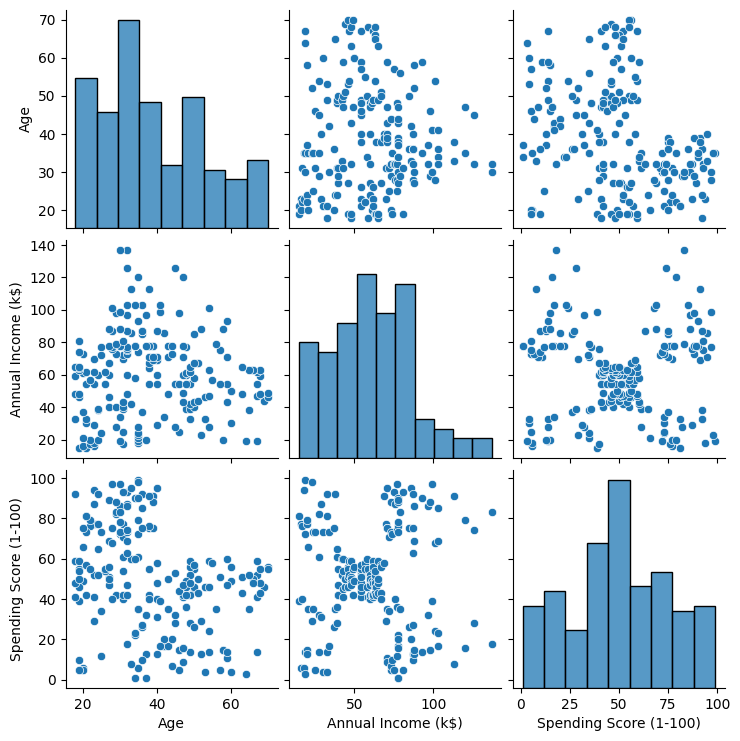

In [2]:
df1 = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

import seaborn as sns
sns.pairplot(df1)

In [4]:
#KMeans clustering

df_cluster1 = df1.copy()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

kmeans.fit(df1)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)

df_cluster1['cluster'] = kmeans.labels_
df_cluster1

[[45.2173913  26.30434783 20.91304348]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]]
[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]
75350.77917248776


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,2
196,45,126,28,4
197,32,126,74,2
198,32,137,18,4


In [6]:
pd.DataFrame(kmeans.cluster_centers_ , columns = df1.columns)

,Age,Annual Income (k$),Spending Score (1-100)
0,45.217391,26.304348,20.913043
1,43.088608,55.291139,49.569620
2,32.692308,86.538462,82.128205
3,25.521739,26.304348,78.565217
4,40.666667,87.750000,17.583333


* Knee Rule or Elbow method to decide number of clusters

In [8]:
#Knee rule or elbow method

from sklearn.cluster import KMeans

losses = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)
    losses.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

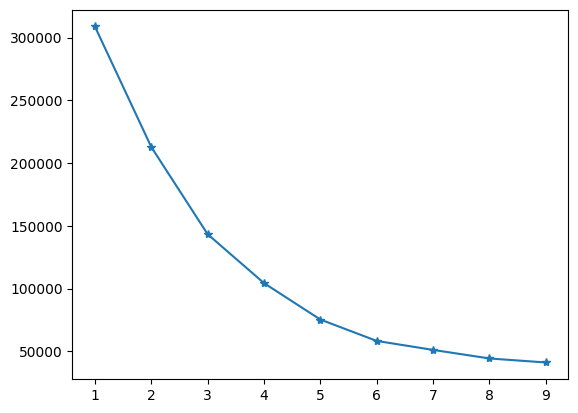

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),losses , marker = '*')
plt.show()

In [13]:
df_cluster2 = df1.copy()

from sklearn.cluster import KMeans
kmeans_6 = KMeans(n_clusters=6)

kmeans_6.fit(df_cluster2)

cluster_centers_6 = pd.DataFrame(kmeans_6.cluster_centers_ , columns = df1.columns)
cluster_centers_6

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100)
0,44.142857,25.142857,19.523810
1,27.000000,56.657895,49.131579
2,41.685714,88.228571,17.285714
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636
5,56.155556,53.377778,49.088889


In [14]:
df_cluster2['clusters'] = kmeans_6.predict(df_cluster2)

In [15]:
df_cluster2

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


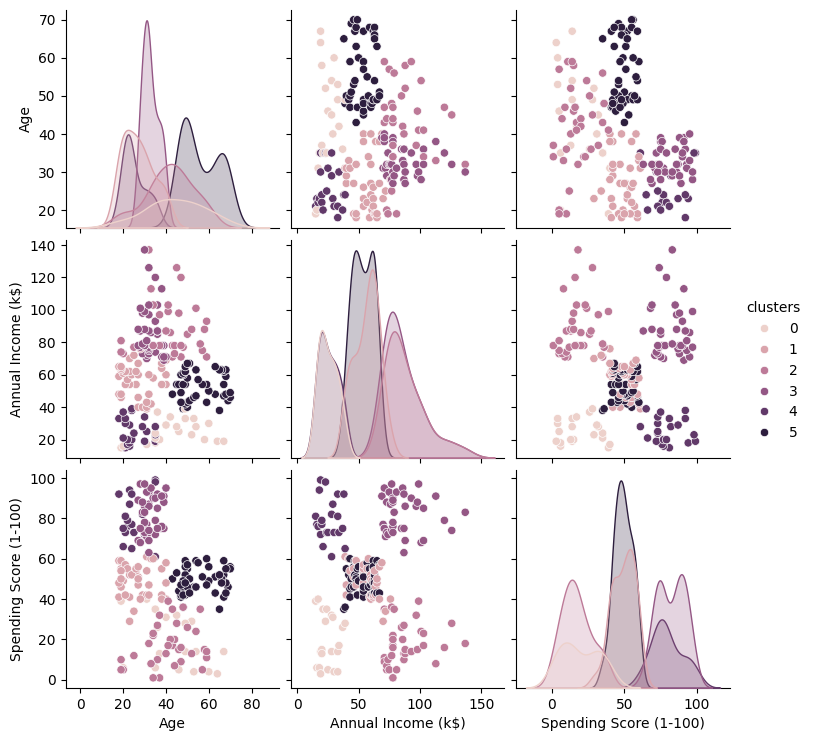

In [16]:
sns.pairplot(df_cluster2 , hue = 'clusters')
plt.show()